<a href="https://colab.research.google.com/github/skhazaei/TensorFlow-repo/blob/master/weight_and_bias_initializers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Default weight and biases:

In tensorflow, the default values of the weights and biases depend on the layer type. For example in a `tf.keras.layers.Dense` layer, the default value of bias is set to `zeros` while the weights are set according to `glorot_uniform`, the Glorot uniform initializer, also called Xavier uniform initializer.

```
tf.keras.layers.Dense(
    units, activation=None, use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None, **kwargs
)
```

The Glorot uniform initialiser draws the weights uniformly at random from the closed interval $[-c, c]$, where 
$$
c=\sqrt{\frac{6}{n_{input}+n_{output}}}
$$ 

$n_{input}$ and $n_{output}$ are the number of input to, and outputs from the layer respectively.

# Set weights and biases:

Each layer has the `kernel_initializer` and `bias_initializer` arguments which are used to set the weights and biases respectively. Note that using these arguments for a  max pooling layer which has no weights and biases, will throw an error.

In [1]:
import tensorflow as tf

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv1D(filters=16, kernel_size=3, input_shape=(128, 64), 
                                                           kernel_initializer='random_uniform',
                                                           bias_initializer='zeros',
                                                           activation='relu'),
                                    tf.keras.layers.MaxPooling1D(pool_size=4),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, kernel_initializer='he_uniform',
                                                          bias_initializer='one', activation='relu')
])

# The weights and biases can instantiated in a slightly different manner, allowing us to set optional arguments of the initialisation method.

In [2]:
model.add(tf.keras.layers.Dense(
    64,
    activation='relu',
    bias_initializer = tf.keras.initializers.Constant(value = 0.4),
    kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05)
    ))

model.add(tf.keras.layers.Dense(
    8,
    activation='relu',
    kernel_initializer=tf.keras.initializers.Orthogonal(gain=1.0, seed=None),
    bias_initializer=tf.keras.initializers.Constant(value=0.4)
))

# Custom weight and bias initialisers
It is also possible to define your own weight and bias initialisers.
Initializers must take in two arguments, the `shape` of the tensor to be initialised, and its `dtype`.

Here is a small example, which also shows how you can use your custom initializer in a layer.

In [3]:
import tensorflow.keras.backend as K

# Define a custom initializer
def my_init(shape, dtype=None):
    return K.random_normal(shape, dtype=dtype)

model.add(tf.keras.layers.Dense(64, kernel_initializer=my_init))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 126, 16)           3088      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 31, 16)            0         
_________________________________________________________________
flatten (Flatten)            (None, 496)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                31808     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                5

In [5]:
import matplotlib.pyplot as plt

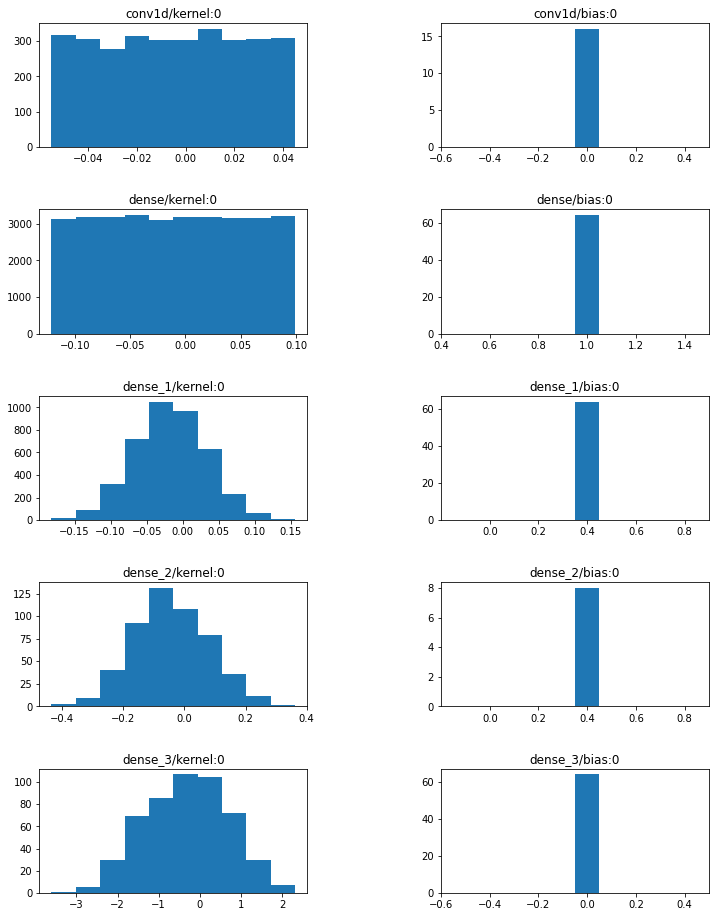

In [6]:
# Plot histograms of weight and bias values

fig, axes = plt.subplots(5, 2, figsize=(12,16))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Filter out the pooling and flatten layers, that don't have any weights
weight_layers = [layer for layer in model.layers if len(layer.weights) > 0]

for i, layer in enumerate(weight_layers):
    for j in [0, 1]:
        axes[i, j].hist(layer.weights[j].numpy().flatten(), align='left')
        axes[i, j].set_title(layer.weights[j].name)